In [1]:
# Assignment for Linear Regression to predict the Air Temperature based on the remaining feature columns.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np

In [2]:
df = pd.read_csv('ai4i2020.csv')
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
#Observations EDA
# Air Temperature is the label and the rest of the columns are the features.
# UDI & Product ID are redundant for this use case and are categorical features .These can be droppped 
# No Missing Values for the features.Imputation not required.
# From Pearson's Graph there is a multi-colinearity with Machine Failure & (OSF,PWF,HDF,TWF,RNF). 
# Hence only Machine Failure can be considered.Rest of the features can be dropped 
# Air Temperature, Process Temperature,Rotational Speed, Torque are Normally Distributed.
# Tool Wear is not normally distributed.
# Air Temperature vs Process Temprature is linearly correlated .
# Rotational Speed & Torque are multi-colinear , but not related to Air Temp. The R and adjusted R value remains unchanged.
# Toolware is also not related to Air Temperature. The R and adjusted R value remains unchanged.
# Type has a higher P Value , hence discarding , also adjusted R^2 is not increasing .
# Adjusted R^2 is increasing bcoz of Machine Failure.


In [3]:
#Rename the table columns to one word first.
df.rename(columns = {'Product ID':'Product_Id','Air temperature [K]':'Air_Temp','Process temperature [K]':'Process_Temp',
                         'Rotational speed [rpm]':'RPM','Torque [Nm]':'Torque', 'Tool wear [min]':'Toolware', 'Machine failure':'Machine_failure'}, inplace = True)
df.columns

Index(['UDI', 'Product_Id', 'Type', 'Air_Temp', 'Process_Temp', 'RPM',
       'Torque', 'Toolware', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

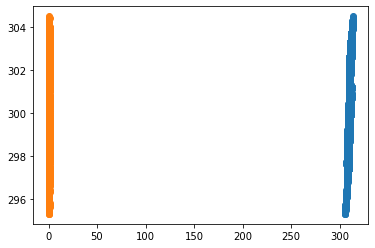

In [179]:
plt.scatter(df['Process_Temp'],df['Air_Temp'])
plt.scatter(df['Machine_failure'],df['Air_Temp'])

In [181]:
# Drop Redundant Columns. Machine Failure Replaces the sub failures .
df.drop(columns=['UDI'],inplace=True)
df.drop(columns=['Product_Id'],inplace=True)
df.drop(columns=['TWF','HDF','PWF','OSF','RNF'],inplace=True)

In [182]:
df.head()

,Type,Air_Temp,Process_Temp,RPM,Torque,Toolware,Machine_failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [183]:
#Checking if any value is null, none in this case. Hence no missing values
df.isnull().sum()

Type               0
Air_Temp           0
Process_Temp       0
RPM                0
Torque             0
Toolware           0
Machine_failure    0
dtype: int64

In [184]:
#Convert the Categorical feature Type to Numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])


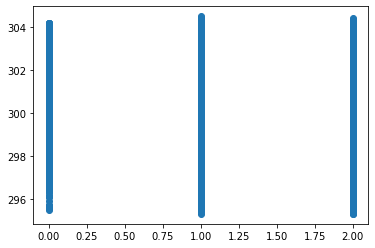

In [186]:
plt.scatter(df['Type'],df['Air_Temp'])

In [187]:
df.dtypes

Type                 int64
Air_Temp           float64
Process_Temp       float64
RPM                  int64
Torque             float64
Toolware             int64
Machine_failure      int64
dtype: object

In [188]:
df.sample(5)

,Type,Air_Temp,Process_Temp,RPM,Torque,Toolware,Machine_failure
2646,2,299.8,309.5,1453,43.2,153,0
7390,2,299.7,310.5,1490,41.2,126,0
1921,1,298.1,307.9,1665,32.0,7,0
8623,2,297.5,308.3,1476,45.6,31,0
2306,1,299.1,308.6,1260,57.8,152,0


In [58]:
pf = ProfileReport(df)

In [189]:
pf.to_widgets()

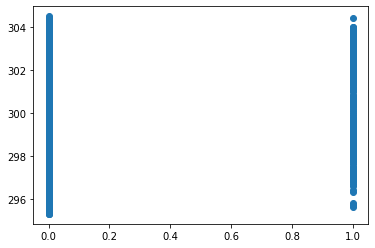

In [89]:
# Scatter plot show RPM, Torque and Toolware has no relationship with Air Temp
#plt.scatter(df['Toolware'],df['Air_Temp'])
plt.scatter(df['Machine_failure'],df['Air_Temp'])

In [193]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Air_Temp ~ Process_Temp+Machine_failure', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Air_Temp   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 1.675e+04
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:06:18   Log-Likelihood:                -13769.
No. Observations:               10000   AIC:                         2.754e+04
Df Residuals:                    9997   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -65.3942      2.005    -32.614      0.000     -69.325     -61.464
Process_Temp        1.1786      0.006    182.222      0.000       1.166       1.191
Machine_failure     0.5651      0.053     10.657      0.000       0.461       0.669
==============================================================================
Omnibus:                      688.725   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.706
Skew:                          -0.107   Prob(JB):                     8.10e-56
Kurtosis:                       2.249   Cond. No.                     6.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y = df[['Air_Temp']]

In [147]:
#Incluing Machine Failure , although there is not much change.
x = df[['Process_Temp','Machine_failure']]

In [105]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [148]:
linear.fit(x,y)

LinearRegression()

In [149]:
linear.intercept_

array([-65.39420625])

In [150]:
linear.coef_

array([[1.17862396, 0.56509675]])

In [151]:
linear.score(x,y)

0.7701745728228202

In [152]:
linear.predict([[311.1,0]])

array([[301.27570642]])

In [153]:
#Test Train Split
from sklearn.linear_model import Ridge,Lasso ,RidgeCV,LassoCV , ElasticNet , ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y,test_size= 0.15,random_state = 100)

In [154]:
#Train
linear.fit(x_train,y_train)

LinearRegression()

In [155]:
linear.intercept_

array([-64.69851121])

In [156]:
linear.coef_

array([[1.17638034, 0.55733421]])

In [157]:
linear.score(x_train,y_train)

0.7670452862210061

In [158]:
linear.predict([[311.1,0]])

array([[301.2734119]])

In [159]:
#Test
linear.fit(x_test,y_test)

LinearRegression()

In [121]:
linear.intercept_

array([-70.10023196])

In [122]:
linear.coef_

array([[1.1938731]])

In [160]:
linear.score(x_test,y_test)

0.7870020486875324

In [161]:
linear.predict([[311.1,0]])

array([[301.28791861]])

In [162]:
# LASSO Test
lassocv = LassoCV(alphas=None,cv= 50 , max_iter=200000, normalize=True)
lassocv.fit(x_train,y_train)
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Lasso(alpha=1.8883197445988377e-05)

In [163]:
lasso.intercept_

array([-64.69656536])

In [164]:
lasso.coef_

array([1.17637412, 0.55675126])

In [165]:
lasso.score(x_test,y_test)

0.7868680143356827

In [166]:
lasso.predict([[311.1,0]])

array([301.27342458])

In [168]:
#Ridged
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10 , normalize=True)
ridgecv.fit(x_train,y_train)
ridge_lr = Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(x_train,y_train)

Ridge(alpha=0.18807298275671513)

In [169]:
ridge_lr.score(x_test,y_test)

0.7868681289570569

In [170]:
ridge_lr.predict([[311.1,0]])

array([[301.27341323]])

In [171]:
#ElasticNet
elastic= ElasticNetCV(alphas=None, cv = 10 )
elastic.fit(x_train,y_train)
elastic_lr = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio_)
elastic_lr.fit(x_train,y_train)

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ElasticNet(alpha=0.005142712842076148)

In [172]:
elastic_lr.score(x_test,y_test)

0.7866219115629278

In [194]:
elastic_lr.predict([[311.1,0]])

array([301.27494982])